In [ ]:
# Where to find the data:
# https://www.kaggle.com/datasets/bharatnatrayn/movies-dataset-for-feature-extracion-prediction


In [1]:
import pandas as pd
import seaborn as sns

df = pd.read_csv("movies.csv", index_col=None)
df.head()


,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN
4,Army of Thieves,(2021),"\nAction, Crime, Horror",NaN,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN,NaN


In [2]:
df.drop(columns=['ONE-LINE', 'STARS'], inplace=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   MOVIES   9999 non-null   object 
 1   YEAR     9355 non-null   object 
 2   GENRE    9919 non-null   object 
 3   RATING   8179 non-null   float64
 4   VOTES    8179 non-null   object 
 5   RunTime  7041 non-null   float64
 6   Gross    460 non-null    object 
dtypes: float64(2), object(5)
memory usage: 546.9+ KB


# Cleaning the "Year" Column

### Current variations in the data:
1. (2021)
2. (2021- )
3. (2010-2022)
4. (2021 TV Special)
5. (I) (2013-2016)


In [3]:
df["sequel"] = df["YEAR"].str.extract(r'([I]+)')
df["sequel"].iloc[880:890,]



880      I
881    NaN
882    NaN
883    NaN
884    NaN
885    NaN
886    NaN
887    NaN
888      I
889     II
Name: sequel, dtype: object

In [4]:
years_range = df["YEAR"].str.extract(r'([\d–]+)')

years_split = years_range[0].str.split("–", expand=True)
years_split.head()


,0,1
0,2021,None
1,2021,
2,2010,2022
3,2013,
4,2021,None


In [5]:
df["year_1"] = years_split[0]
df["year_2"] = years_split[1]

df.drop(columns=["YEAR"], inplace=True)
df[["sequel", "year_1", "year_2"]].iloc[880:890,]


,sequel,year_1,year_2
880,I,2018,None
881,NaN,2021,
882,NaN,1997,None
883,NaN,2016,None
884,NaN,2012,None
885,NaN,2017,2020
886,NaN,2007,None
887,NaN,2019,
888,I,2019,None
889,II,2018,None


In [6]:
df["GENRE"].iloc[0]


'\nAction, Horror, Thriller            '

In [7]:
df["GENRE"] = df["GENRE"].str.strip()
genres = df["GENRE"].str.split(", ", expand=True)

df["genre1"] = genres[0]
df["genre2"] = genres[1]
df["genre3"] = genres[2]

df.drop(columns=["GENRE"], inplace=True)
df.head()


,MOVIES,RATING,VOTES,RunTime,Gross,sequel,year_1,year_2,genre1,genre2,genre3
0,Blood Red Sky,6.1,"21,062",121.0,NaN,NaN,2021,None,Action,Horror,Thriller
1,Masters of the Universe: Revelation,5.0,"17,870",25.0,NaN,NaN,2021,,Animation,Action,Adventure
2,The Walking Dead,8.2,"885,805",44.0,NaN,NaN,2010,2022,Drama,Horror,Thriller
3,Rick and Morty,9.2,"414,849",23.0,NaN,NaN,2013,,Animation,Adventure,Comedy
4,Army of Thieves,NaN,NaN,NaN,NaN,NaN,2021,None,Action,Crime,Horror


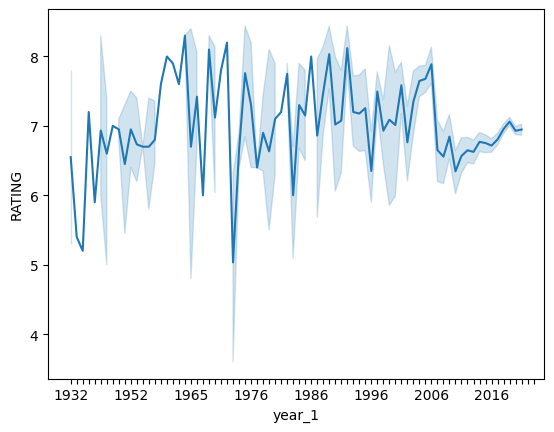

In [8]:
plot_df = df[["year_1", "RATING"]].copy()
plot_df.sort_values(inplace=True, by="year_1")

g = sns.lineplot(x="year_1", y="RATING", data=plot_df)

for ind, label in enumerate(g.get_xticklabels()):
    if ind % 10 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)


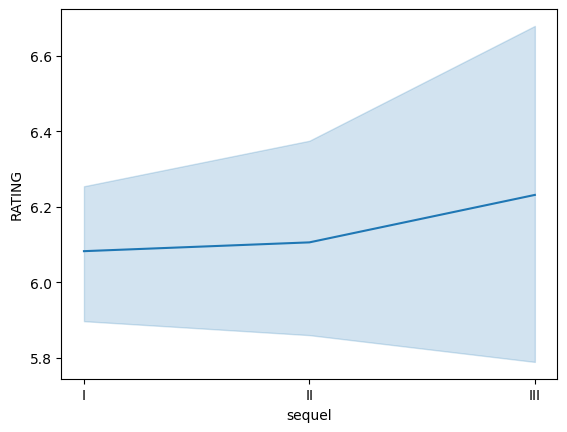

In [9]:
plot_df = df[["sequel", "RATING"]].copy()
plot_df.sort_values(inplace=True, by="sequel")

g = sns.lineplot(x="sequel", y="RATING", data=plot_df)
